In [15]:
import nibabel as nib
import numpy as np
import pandas as pd
import os


In [16]:
def squeeze_dim(img):
    if img.ndim == 4: 
        if img.shape[0] == 1:
            img = np.squeeze(img,axis=0)
        if img.shape[1] == 1:
            img = np.squeeze(img,axis=1)
        if img.shape[2] == 1:
            img = np.squeeze(img,axis=2)
        if img.shape[3] == 1:
            img = np.squeeze(img,axis=3)
    else:
        pass
    return img

def trans_to_test_angle(img):

    img = squeeze_dim(img)
    img = img.transpose((2,1,0))
    img = img[::-1,::-1,::-1]
    return img

In [18]:
def new_angle(df, output_floder='new_angle_vali'):
    target_floder = '../../tensorflow/crop_vali'
    aff = np.eye(4)
    # output_floder='shift'
    for i, item in df.iterrows():

        img_path = ''.join([str(target_floder), '/image/', item[0]])
        mask_path = ''.join([str(target_floder), '/label/', item[0]])
        nii_img = nib.load(img_path)
        img = nii_img.get_data()
        img = trans_to_test_angle(img)
        nii_mask = nib.load(mask_path)
        mask = nii_mask.get_data()
        mask = trans_to_test_angle(mask)

        new_img_path = ''.join([str(output_floder), '/image/'])
        if not os.path.exists(new_img_path):
            os.makedirs(new_img_path)
        nib.save(nib.Nifti1Image(img, affine=aff),
                 new_img_path + df.ix[i].path[:-7] + output_floder + '.nii.gz')

        new_mask_path = ''.join([str(output_floder), '/label/'])
        if not os.path.exists(new_mask_path):
            os.makedirs(new_mask_path)
        nib.save(nib.Nifti1Image(mask, affine=aff),
                 new_mask_path + df.ix[i].path[:-7] + output_floder + '.nii.gz')
        
df = pd.read_csv("../../tensorflow/vali.csv")
new_angle(df)
print("done!")

/home/yanyu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


done!


#  将样本通过一下变换之后能够得到和未知名的test样本角度完全一致
### <font color=#0000ff size=4 face="黑体"> 可取100个以下变换后的样本作为训练集,待验证精度达到可观的数值后,停止训练.然后进行额外test的推断</font>

## <font color=#0099ff size=4 face="黑体"> 生成一个csv文件,并将两个csv文件数据作图 </font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

lis1,lis2,lis3,lis4 = [],[],[],[]
lis4 = np.arange(23)*5
df1 = pd.read_csv("build_model1_1.csv")
df2 = pd.read_csv("build_model1_2_vali_log.csv")
df3 = pd.read_csv("build_modle1_3vali_log.csv")
for [_, item1],[i,item2], [_, item3]in zip(df1.iterrows(),df2.iterrows(),df3.iterrows()):
    lis1.append(item1[2])
    lis2.append(item2[2])
    lis3.append(item3[2])
    #lis4.append(item1[0])

#print(lis1)

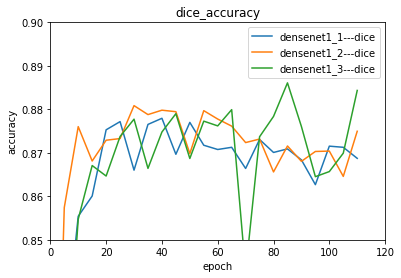

0.877939732743
0.880852415282
0.886086340763


In [2]:
plt.figure(1)
plt.plot(lis4,lis1,label='densenet1_1---dice')
plt.plot(lis4,lis2,label='densenet1_2---dice')
plt.plot(lis4,lis3,label='densenet1_3---dice')
#plt.plot(list_epoch,lis4,label='y = x^3 + x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('dice_accuracy')   
#plt.savefig("record_dice.jpg")
plt.axis([0, 120, 0.85, 0.9])
plt.show()

print np.array(lis1).max()
print np.array(lis2).max()
print np.array(lis3).max()

#### 总体来说三个vali_dice结果差不多，只是第三次可能略高些

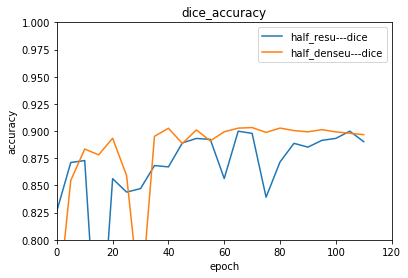

0.899911262058
0.903223147309


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

lis1,lis2,lis3,lis4 = [],[],[],[]
lis4 = np.arange(23)*5
df1 = pd.read_csv("../re_unet_amend.csv")
df2 = pd.read_csv("half_densu1_2vali_log.csv")
df3 = pd.read_csv("half_denseu1_1vali_log.csv")
#df3 = pd.read_csv("../half_denseu_amend.csv")
for [_, item1],[i,item2], [_, item3]in zip(df1.iterrows(),df2.iterrows(),df3.iterrows()):
    lis1.append(item1[2])
    lis2.append(item2[2])
    lis3.append(item3[2])
    
    
plt.figure(1)
#plt.plot(lis4,lis1,label='u-net---dice')
plt.plot(lis4,lis2,label='half_resu---dice')
plt.plot(lis4,lis3,label='half_denseu---dice')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('dice_accuracy')   
#plt.savefig("record_dice.jpg")
plt.axis([0, 120, 0.8, 1.0])  
plt.show()

#print np.array(lis1).max()
print np.array(lis2).max()
print np.array(lis3).max()
